In [ ]:
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Resizing the image**

Conventionally, when dealing with images of different sizes in CNN(which happens very often in real world problems), we resize the images to the size of the smallest images with the help of any image manipulation library (OpenCV, PIL etc) or some times, pad the images of unequal size to desired size. Resizing the image is simpler and is used most often

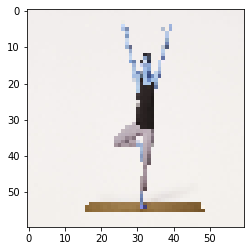

In [ ]:
image = cv2.imread('DATASET/TEST/tree/00000003.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

plt.imshow(image)

# **ImageDataGenerator class**


The ImageDataGenerator class is very useful in image classification. There are several ways to use this generator, depending on the method we use, here we will focus on flow_from_directory takes a path to the directory containing images sorted in sub directories and image augmentation parameters.

The ImageDataGenerator is an easy way to load and augment images in batches for image classification tasks

The dataset is divided into train and test subdirectories, with 5 sub folders in each directory corresponding to the 5 classes of yoga poses. The images are extracted from bing using their API functionality so they may not be very accurate (watermarks, text may exist)


In [ ]:
# source directory for training images
train_dir = 'DATASET/TRAIN'

# source directory for validation images
validation_dir  = 'DATASET/TEST'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')


Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


# **Model Creation**
A CNN is made up of multiple layers of neurons, each of which is a nonlinear operation on a linear transformation of the preceding layer's outputs. The layers mainly include convolutional layers and pooling layers. The convolutional layers have weights that need to be trained, while the pooling layers transform the activation using a fixed function.

The use of dropout has the benefit of using a combination of different networks in one architecture and preventing units from co-adapting in an excessive way. The dropout function is known to work well in fully-connected layers as well as in pooling layers

In [ ]:
## Creating the model 
inputs = tf.keras.layers.Input(shape = (150,150,3,))
b1 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3),padding = 'same',activation = 'relu')(inputs)
b1 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b1)
b1 = tf.keras.layers.MaxPool2D(2,2)(b1)
b1 = tf.keras.layers.Dropout(0.2)(b1)

b2 = tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b1)
b2 = tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b2)
b2 = tf.keras.layers.MaxPool2D(2,2)(b2)
b2 = tf.keras.layers.Dropout(0.2)(b2)

b3 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b2)
b3 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b3)
b3= tf.keras.layers.MaxPool2D(2,2)(b3)
b3 = tf.keras.layers.Dropout(0.2)(b3)

b4 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b3)
b4 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b4)
b4= tf.keras.layers.MaxPool2D(2,2)(b4)
b4 = tf.keras.layers.Dropout(0.2)(b4)

b5 = tf.keras.layers.Conv2D(filters = 512 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b4)
b5 = tf.keras.layers.Conv2D(filters = 512 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b5)
b5= tf.keras.layers.MaxPool2D(2,2)(b5)
b5 = tf.keras.layers.Dropout(0.2)(b5)


g1 = tf.keras.layers.Flatten()(b5)
d1= tf.keras.layers.Dense(1024,activation = 'relu')(g1)
d2 = tf.keras.layers.Dense(5,activation = 'softmax')(d1)
model = tf.keras.Model(inputs = inputs,outputs = d2)


model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 1e-4),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()



Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 75, 75, 128)       1475

# **Callbacks**

When training a machine learning model, we would like to have the ability to monitor the model performance and perform certain actions depending on those performance measures. 

**CSVLogger**: a callback streams epoch results to a CSV file.

In [ ]:
## training the model
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator,
                    callbacks = [tf.keras.callbacks.CSVLogger('training.csv')]
                   )

Epoch 1/100
55/55 [==============================] - 61s 1s/step - loss: 1.6114 - accuracy: 0.2380 - val_loss: 1.6028 - val_accuracy: 0.2447
Epoch 2/100
55/55 [==============================] - 53s 961ms/step - loss: 1.6020 - accuracy: 0.2485 - val_loss: 1.5988 - val_accuracy: 0.2447
Epoch 3/100
55/55 [==============================] - 54s 977ms/step - loss: 1.5943 - accuracy: 0.2557 - val_loss: 1.5939 - val_accuracy: 0.2809
Epoch 4/100
55/55 [==============================] - 53s 956ms/step - loss: 1.5970 - accuracy: 0.2374 - val_loss: 1.5956 - val_accuracy: 0.2447
Epoch 5/100
55/55 [==============================] - 52s 945ms/step - loss: 1.5923 - accuracy: 0.2562 - val_loss: 1.5779 - val_accuracy: 0.2872
Epoch 6/100
55/55 [==============================] - 52s 948ms/step - loss: 1.5946 - accuracy: 0.2470 - val_loss: 1.5680 - val_accuracy: 0.3511
Epoch 7/100
55/55 [==============================] - 52s 952ms/step - loss: 1.5722 - accuracy: 0.2751 - val_loss: 1.4836 - val_accuracy: 0.

In [ ]:
model.save('model.h5')

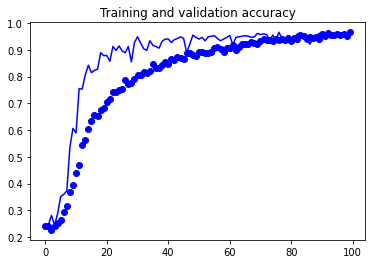

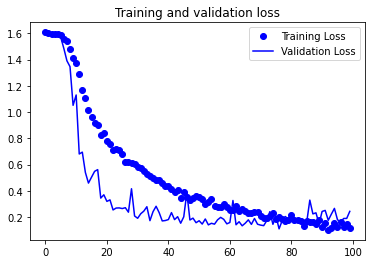

In [ ]:
## Visualising the Accuracy and loss plots

callback_csv = pd.read_csv('./training.csv')
acc = callback_csv['accuracy']
val_acc = callback_csv['val_accuracy']
loss = callback_csv['loss']
val_loss = callback_csv['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

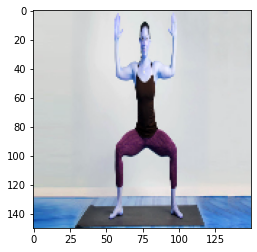

In [ ]:
image = cv2.imread('../input/yoga-poses-dataset/DATASET/TEST/goddess/00000001.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

plt.imshow(image)

In [ ]:
## Testing with an example

image = cv2.imread('../input/yoga-poses-dataset/DATASET/TEST/goddess/00000001.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

image = image.reshape(1,150,150,3)

image.shape



(1, 150, 150, 3)

When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: **[1, image_width, image_height, number_of_channels]**

In [ ]:
# Converting the one hot encoded output to display the output class

dict  = {1: 'Downdog', 2: 'Goddess', 3: 'Plank',4: 'Tree',5: 'Warrior2'}

def out_conversion(out_array):
    for i in range(5):
        if out_array[i] == 1.:
            return dict[i+1]
        

In [ ]:
model = tf.keras.models.load_model('./model.h5')
out_arr = model.predict(image)[0]
print(f'Predicted class is : {out_conversion(out_arr)}')

Predicted class is : Goddess
